# Part-1: Data Exploration and Pre-processing

Importing the files

In [13]:
from sklearn.cluster import KMeans
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

1. Load dataset.

In [2]:
cd E:\Data Sci\Machince_Langauage\Ass

E:\Data Sci\Machince_Langauage\Ass


In [3]:
data = pd.read_csv("Ass-10.csv")

2. Find shape of dataset.

In [4]:
data.shape

(569, 32)

3. Show basic information of data.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

4. Check null values.

In [6]:
data.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

5. Drop unnamed and id columns.

In [7]:
data = data.drop(['id'],axis = 1)

6. Show values counts in diagnosis column.

In [9]:
data['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

7. Remove Label column diagnosis.

In [10]:
data1 = data.drop(['diagnosis'] , axis =1)

In [11]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              569 non-null    float64
 1   texture_mean             569 non-null    float64
 2   perimeter_mean           569 non-null    float64
 3   area_mean                569 non-null    float64
 4   smoothness_mean          569 non-null    float64
 5   compactness_mean         569 non-null    float64
 6   concavity_mean           569 non-null    float64
 7   concave points_mean      569 non-null    float64
 8   symmetry_mean            569 non-null    float64
 9   fractal_dimension_mean   569 non-null    float64
 10  radius_se                569 non-null    float64
 11  texture_se               569 non-null    float64
 12  perimeter_se             569 non-null    float64
 13  area_se                  569 non-null    float64
 14  smoothness_se            5

8. Create pair plot between two column radius_mean and radius_mean by diagnosis.

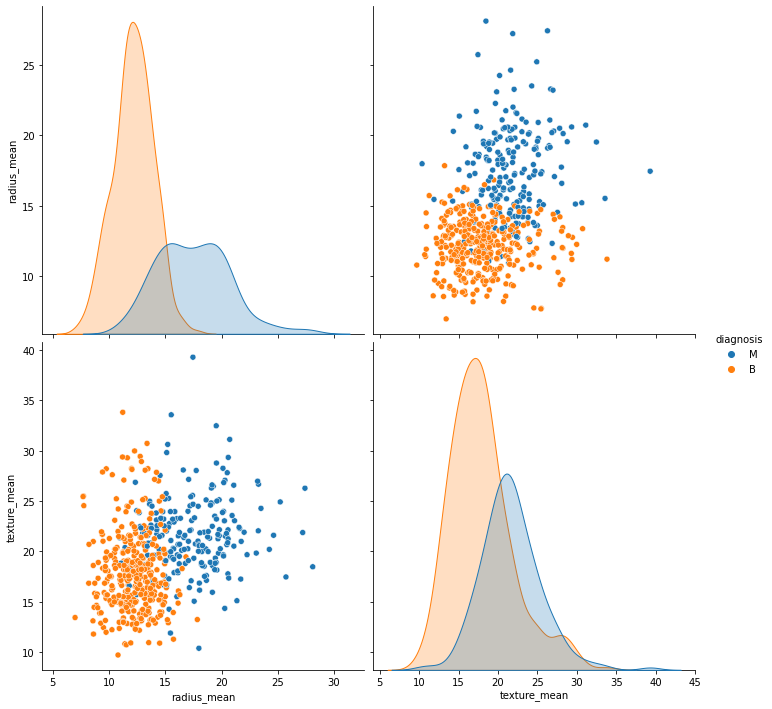

In [14]:
sns.pairplot(data.loc[:,['radius_mean','texture_mean', 'diagnosis']], hue = "diagnosis", height = 5)
plt.show()

9. Select only two feature radius_mean & texture_mean for clustering in new dataset.

In [17]:
new_data = data.loc[:,['radius_mean','texture_mean']]
new_data.head()

,radius_mean,texture_mean
0,17.99,10.38
1,20.57,17.77
2,19.69,21.25
3,11.42,20.38
4,20.29,14.34


10.Apply scaling on new dataset.

In [18]:
from sklearn.preprocessing import RobustScaler

In [23]:
Ro_scaler = RobustScaler()

In [24]:
new_data= Ro_scaler.fit_transform(new_data)

In [26]:
new_data1 = Ro_scaler.fit_transform(new_data)

In [27]:
new_data1 =pd.DataFrame(new_data , columns=['radius_mean','texture_mean'])

In [28]:
new_data1

,radius_mean,texture_mean
0,1.132353,-1.502664
1,1.764706,-0.190053
2,1.549020,0.428064
3,-0.477941,0.273535
4,1.696078,-0.799290
...,...,...
564,2.007353,0.630551
565,1.656863,1.671403
566,0.791667,1.641208
567,1.772059,1.863233


# Part-2: Working with Models

1. Display hierarchical clustering as a dendrogram using scipy.

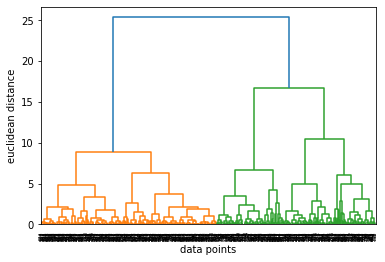

In [30]:
#The following linkage methods are used to compute the distance between two clusters 
# method='ward' uses the Ward variance minimization algorithm
from scipy.cluster.hierarchy import linkage,dendrogram
merg = linkage(new_data1, method = "ward")
#Plot the hierarchical clustering as a dendrogram.
#leaf_rotation : double, optional Specifies the angle (in degrees) to rotate the leaf labels.
dendrogram(merg, leaf_rotation = 90)
plt.xlabel("data points")
plt.ylabel("euclidean distance")
plt.show()

2. Apply Agglomerative Clustering on dataset with 2 n number of clusters.

In [31]:
from sklearn.cluster import AgglomerativeClustering

3. Predict the cluster and create new column for cluster label data.

In [32]:
hc = AgglomerativeClustering(n_clusters = 2, affinity = "euclidean", linkage = "ward")
cluster = hc.fit_predict(new_data1) #cluster = y_predicted

In [33]:
from sklearn.cluster import AgglomerativeClustering

In [34]:
new_data1["label"] = cluster

In [35]:
new_data1.head()

,radius_mean,texture_mean,label
0,1.132353,-1.502664,1
1,1.764706,-0.190053,0
2,1.549020,0.428064,0
3,-0.477941,0.273535,1
4,1.696078,-0.799290,0


4. Check count of label.

In [36]:
new_data1['label'].value_counts()

1    299
0    270
Name: label, dtype: int64

5. Plot the label data.

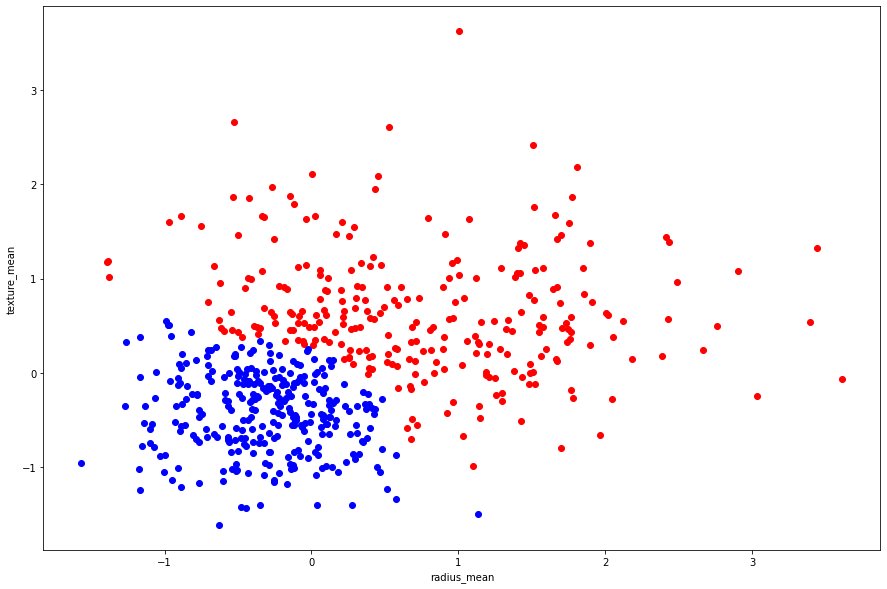

In [38]:
plt.figure(figsize = (15, 10))
plt.scatter(new_data1["radius_mean"][new_data1.label == 0], new_data1["texture_mean"][new_data1.label == 0], color = "red")
plt.scatter(new_data1["radius_mean"][new_data1.label == 1], new_data1["texture_mean"][new_data1.label == 1], color = "blue")

plt.xlabel("radius_mean")
plt.ylabel("texture_mean")
plt.show()

6. Check the silhouette score.

In [39]:
from sklearn.metrics import silhouette_score

In [41]:
score = silhouette_score(new_data1, cluster)
score

0.4938962664862693

7. Now apply kmeans clustering no dataset with 2 number of clusters.

In [44]:
new_data_k = data.loc[:,['radius_mean','texture_mean']]
new_data_k.head()

,radius_mean,texture_mean
0,17.99,10.38
1,20.57,17.77
2,19.69,21.25
3,11.42,20.38
4,20.29,14.34


In [45]:
km = KMeans(n_clusters=2,)
km.fit(new_data_k)

KMeans(n_clusters=2)

8. Check wcss score.

In [46]:
wcss = km.inertia_
wcss

9403.76824064772

9. Try different N number from 1 to 10 and plot the result of wcss score.

In [50]:
import warnings
warnings.filterwarnings("ignore")

In [52]:
#create empty list
wcss = []
#select k value from 1 to 10
for i in range(1, 11):
    km = KMeans(n_clusters = i, random_state = 42)
    km.fit(new_data_k)
    # inertia method returns wcss for that model
    wcss.append(km.inertia_)

For K value we will found Ellbow.

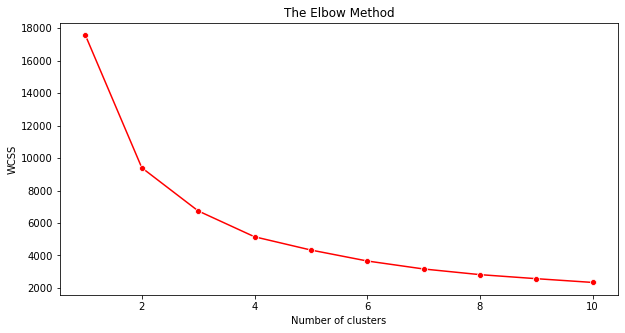

In [53]:
plt.figure(figsize=(10,5))
sns.lineplot(range(1, 11), wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

10.Apply kmeans again with different no. of cluster according to best wcss score.

In [54]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(new_data_k)

11.Create column for label cluster.

In [55]:
new_data_k["label"] = y_kmeans

In [56]:
new_data_k.head()

,radius_mean,texture_mean,label
0,17.99,10.38,0
1,20.57,17.77,1
2,19.69,21.25,1
3,11.42,20.38,3
4,20.29,14.34,1
